In [157]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [158]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [159]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [164]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [165]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [166]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)



In [167]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [168]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [169]:
#to see all the columns for measurements
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [170]:
#to see all the columns for station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [171]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [172]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

In [173]:
#manually setting the recent data
recent_date=(dt.date(2017, 8 ,23))
recent_date


datetime.date(2017, 8, 23)

In [174]:
#Calculate the date one year from the last date in data set.
one_year_ago=recent_date-dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [175]:
#gets you all the column names and the first values
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa159b79220>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1}

In [176]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()


# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df= session.query(measurement.date,measurement.prcp).\
    filter(measurement.date<=recent_date).filter(measurement.date>=one_year_ago).all()

df_1=pd.DataFrame(df)
df_1.rename(columns={'prcp':'Precipitation'}, inplace=True)
df_1=df_1.sort_values(by="date")
df_1=df_1.set_index("date")
df_1


,Precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

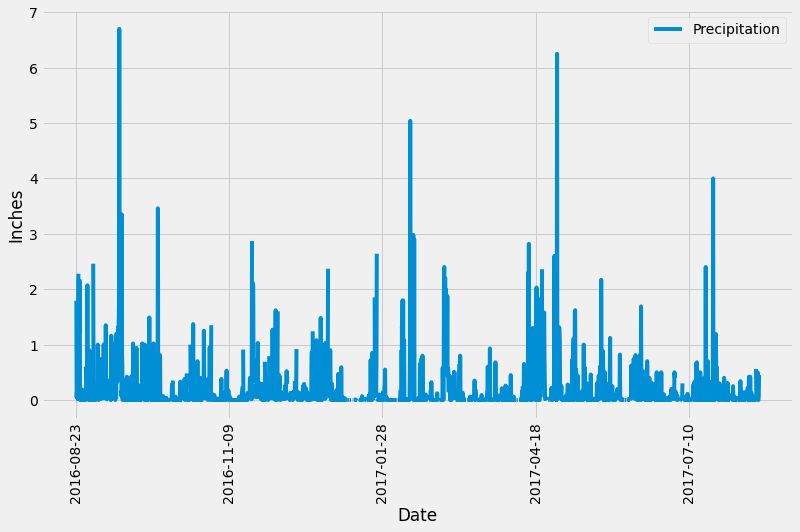

In [177]:
# Use Pandas Plotting with Matplotlib to plot the data
df_1.plot.line(figsize=(12,7))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(['Precipitation'], loc='upper right')
plt.show

In [178]:
# Use Pandas to calcualte the summary statistics for the precipitation data
average=df_1["Precipitation"].mean()
max=df_1["Precipitation"].max()
min=df_1["Precipitation"].min()
sum=df_1["Precipitation"].sum()

print(f"The average amount of precipitation from 8-23-16 through 8-23-17 was {round(average,2)} inches.")
print(f"The maximum precipitation from 8-23-16 through 8-23-17 was {round(max,2)} inches.")
print(f"The minimum precipitation from 8-23-16 through 8-23-17 was {round(min,2)} inches.")
print(f"The total amount of precipitation from 8-23-16 through 8-23-17 was {round(sum,2)} inches.")

The average amount of precipitation from 8-23-16 through 8-23-17 was 0.18 inches.
The maximum precipitation from 8-23-16 through 8-23-17 was 6.7 inches.
The minimum precipitation from 8-23-16 through 8-23-17 was 0.0 inches.
The total amount of precipitation from 8-23-16 through 8-23-17 was 358.28 inches.


# Exploratory Station Analysis

In [179]:
# Design a query to calculate the total number stations in the dataset
count=session.query(station.station).count()
print(f"There are {count} stations in our dataset.")

There are 9 stations in our dataset.


In [180]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_sessions=session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_sessions


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [181]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station=session.query(measurement.station,measurement.tobs).\
    filter(measurement.station=="USC00519281").all()
most_active_station

active_station=pd.DataFrame(most_active_station)
active_station.rename(columns={'tobs':'Temperature'}, inplace=True)
active_station=active_station.sort_values(by="Temperature")
active_station=active_station.set_index("station")

lowest_temp=active_station["Temperature"].min()
highest_temp=active_station["Temperature"].max()
avg_temp=active_station["Temperature"].mean()

print(f"The lowest temperature for station id USC00519281 is {lowest_temp} degrees.")
print(f"The highest temperature for station id USC00519281 is {highest_temp} degrees.")
print(f"The average temperature for station id USC00519281 is {round(avg_temp,1)} degrees.")

The lowest temperature for station id USC00519281 is 54.0 degrees.
The highest temperature for station id USC00519281 is 85.0 degrees.
The average temperature for station id USC00519281 is 71.7 degrees.


Text(0, 0.5, 'Frequency')

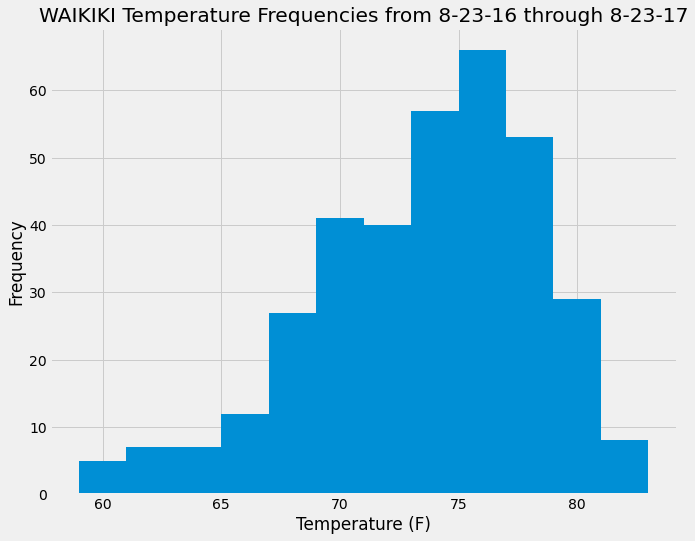

In [182]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_one_year= session.query(measurement.tobs).\
    filter(measurement.station=="USC00519281").filter(measurement.date<=recent_date).filter(measurement.date>=one_year_ago).all()

active_station_one_year=pd.DataFrame(active_station_one_year)
active_station_one_year.rename(columns={'tobs':'Temperature'}, inplace=True)
active_station_one_year.hist(figsize=(10,8),bins=12)
plt.xlabel("Temperature (F)")
plt.title("WAIKIKI Temperature Frequencies from 8-23-16 through 8-23-17")
plt.ylabel("Frequency")


# Close session

In [183]:
# Close Session
session.close()